In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-netflix-shows/netflix_titles.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'/kaggle/input/dataset-netflix-shows/netflix_titles.csv' , index_col = 'show_id')

In [4]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **let us see how much type of shows are listed in dataset**

<Axes: xlabel='type', ylabel='count'>

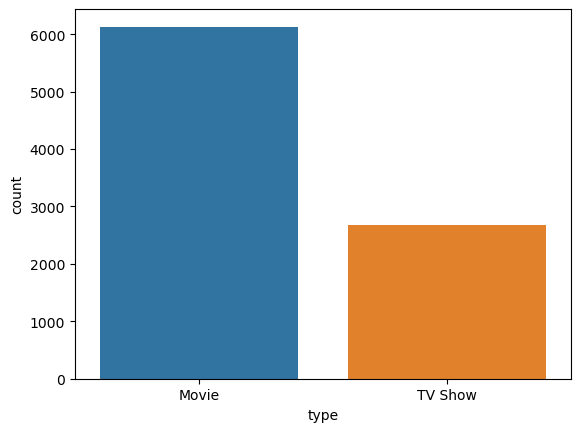

In [5]:
sns.countplot(df , x = 'type')

# **top 10 list of highest duration show**

In [6]:
df[['title' , 'duration']].sort_values(ascending = False , by = 'duration')[0:9]

,title,duration
show_id,,
s1330,The Misadventures of Hedi and Cokeman,99 min
s6279,Being AP,99 min
s953,The Whole Nine Yards,99 min
s6142,American Hangman,99 min
s930,Dead Again in Tombstone,99 min
s5147,The Worthy,99 min
s911,Monster,99 min
s2781,Curtiz,99 min
s895,Dance of the Forty One,99 min


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


# **top 10 largest duration movie in 2021**

In [8]:
movie_21 = df[df['release_year'] == 2021].sort_values(ascending = False , by = 'duration')[0:10]

In [9]:
movie_21[[ 'title' ,'release_year' , 'duration']]

,title,release_year,duration
show_id,,,
s895,Dance of the Forty One,2021,99 min
s911,Monster,2021,99 min
s878,Cinema Bandi,2021,99 min
s782,Black Holes | The Edge of All We Know,2021,99 min
s1330,The Misadventures of Hedi and Cokeman,2021,99 min
s427,Cousins,2021,99 min
s1189,Get the Goat,2021,98 min
s910,Milestone,2021,98 min
s1157,A Week Away,2021,98 min


# **filling the null value**

In [10]:
null_df = pd.DataFrame(df.isnull().sum().sort_values(ascending = False)*100/len(df))[0:6]

In [11]:
null_df

,0
director,29.908028
country,9.435676
cast,9.367549
date_added,0.113546
rating,0.045418
duration,0.034064


In [12]:
df[['rating' , 'date_added' , 'cast' , 'country' , 'director']] = df[['rating' , 'date_added' , 'cast' , 'country' , 'director']].fillna('NA')

In [13]:
null_df = pd.DataFrame(df.isnull().sum().sort_values(ascending = False)*100/len(df))[0:1]

In [14]:
null_df

,0
duration,0.034064


In [15]:
df['duration'] = df['duration'].fillna(0)

# **top 20 country that gives heighest movies on netflix**

In [16]:
movie1 = df[df['type'] == 'Movie']

In [17]:
movie1

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NA,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [18]:
movie2 = pd.DataFrame(movie1['country'].value_counts().reset_index())[0:21]

In [19]:
movie2.columns = ['country' , 'count']

In [20]:
movie2

,country,count
0,United States,2058
1,India,893
2,NA,440
3,United Kingdom,206
4,Canada,122
5,Spain,97
6,Egypt,92
7,Nigeria,86
8,Indonesia,77
9,Turkey,76


<Axes: xlabel='count', ylabel='country'>

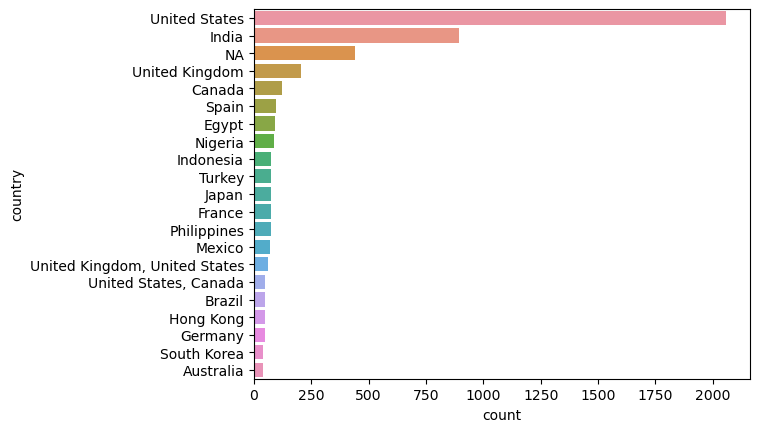

In [21]:
sns.barplot(movie2 , y = 'country' , x = 'count')

# **top 20 countries that gives heighest tv shows in netflix**

In [22]:
tv_shows1 = df[df['type'] == 'TV Show']

In [23]:
tv_shows = tv_shows1['country'].value_counts()

In [24]:
tv_shows = pd.DataFrame(tv_shows)[0:20]

<Axes: xlabel='country'>

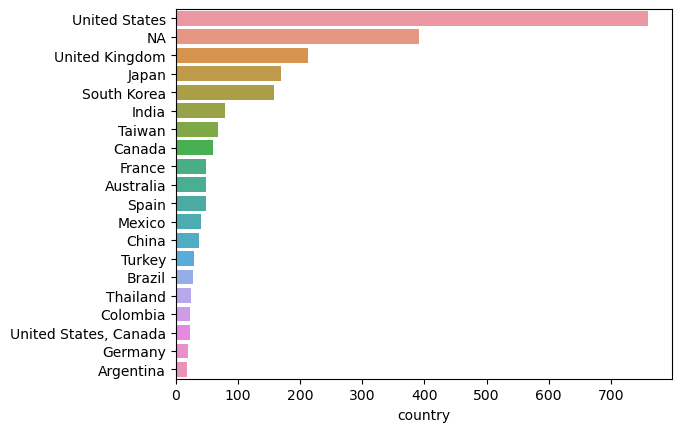

In [25]:
sns.barplot(tv_shows , x = 'country' , y = tv_shows.index)

# **top 10 types of tv programme netflix has streamed**

In [26]:
type_df = pd.DataFrame(df['listed_in'].value_counts())[0:20]

<Axes: xlabel='listed_in'>

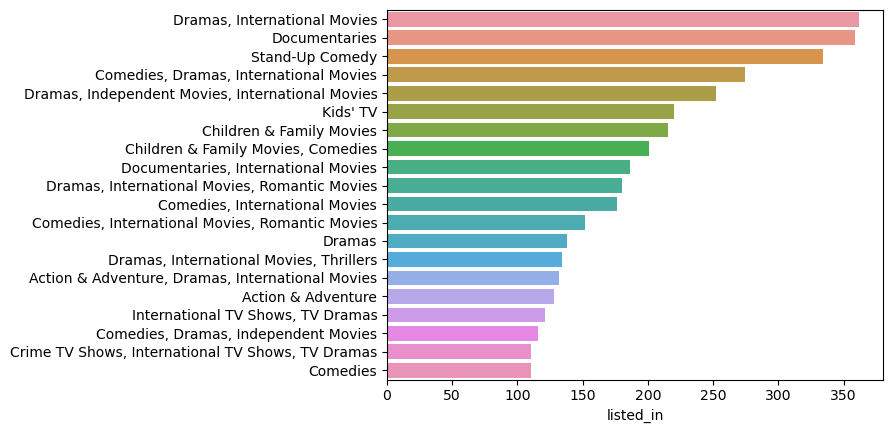

In [27]:
sns.barplot(type_df , y = type_df.index , x = 'listed_in')

# **movies that are made by united states as they are heighest in movie making**

In [28]:
uni_mov = df[(df['country'] == 'United States') & (df['type'] == 'Movie')]

In [29]:
uni_mov = uni_mov[['country' , 'type' , 'title']]

In [30]:
uni_mov[0:10]

,country,type,title
show_id,,,
s1,United States,Movie,Dick Johnson Is Dead
s10,United States,Movie,The Starling
s28,United States,Movie,Grown Ups
s29,United States,Movie,Dark Skies
s42,United States,Movie,Jaws
s43,United States,Movie,Jaws 2
s44,United States,Movie,Jaws 3
s45,United States,Movie,Jaws: The Revenge
s49,United States,Movie,Training Day


# **tv shows that are made by united states as they are heighest in movie making**

In [31]:
uni_tv = df[(df['country'] == 'United States') & (df['type'] == 'TV Show')]

In [32]:
uni_tv = uni_tv[['country' , 'type' , 'title']]

In [33]:
uni_tv[0:10]

,country,type,title
show_id,,,
s16,United States,TV Show,Dear White People
s41,United States,TV Show,He-Man and the Masters of the Universe
s56,United States,TV Show,Nailed It
s68,United States,TV Show,Saved by the Bell
s83,United States,TV Show,Lucifer
s98,United States,TV Show,Kid Cosmic
s107,United States,TV Show,Bunk'd
s126,United States,TV Show,Q-Force
s161,United States,TV Show,Major Dad


# **top 10 movie making director**

In [34]:
movie_dir = df[df['type'] == 'Movie']

<Axes: xlabel='director'>

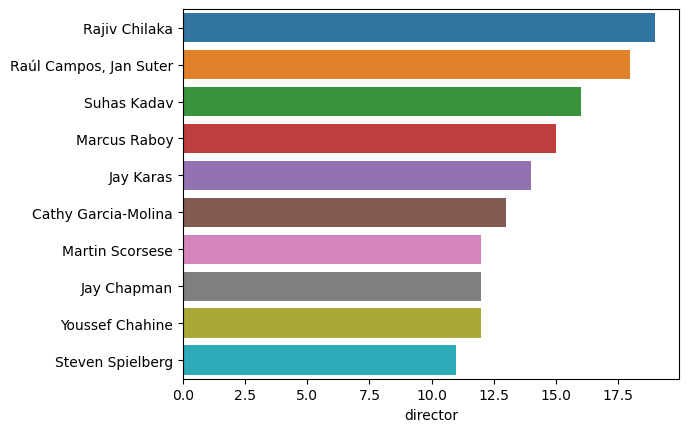

In [35]:
movie_dir1 = pd.DataFrame(movie_dir['director'].value_counts())[1:11]
sns.barplot(movie_dir1 , y = movie_dir1.index , x = 'director')

# **top 10 director from india**

In [36]:
tv_dir = df[df['country'] == 'India']

<Axes: xlabel='director'>

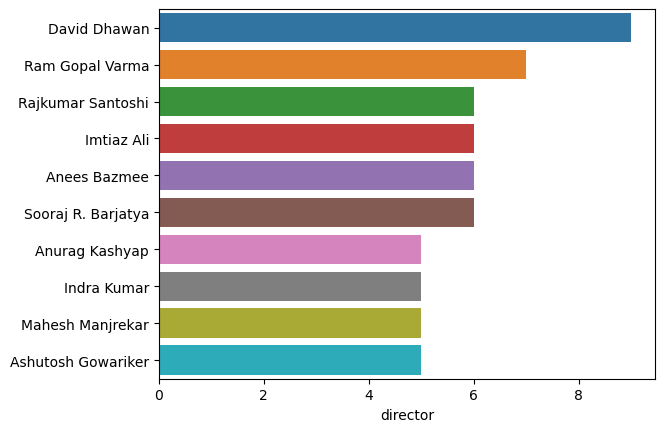

In [37]:
tv_dir1 = pd.DataFrame(tv_dir['director'].value_counts())[1:11]
sns.barplot(tv_dir1 , y = tv_dir1.index , x = 'director')

# **year wise movie release from netflix**

In [38]:
year_mov = df[df['type'] == 'Movie']

In [39]:
year_mov = pd.DataFrame(year_mov['release_year'].value_counts())

In [40]:
year_mov

,release_year
2017,767
2018,767
2016,658
2019,633
2020,517
...,...
1966,1
1961,1
1946,1
1963,1


# **top 10 cast group in netflix**

In [41]:
cast_df = pd.DataFrame(df['cast'].value_counts())[1:11]

<Axes: xlabel='cast'>

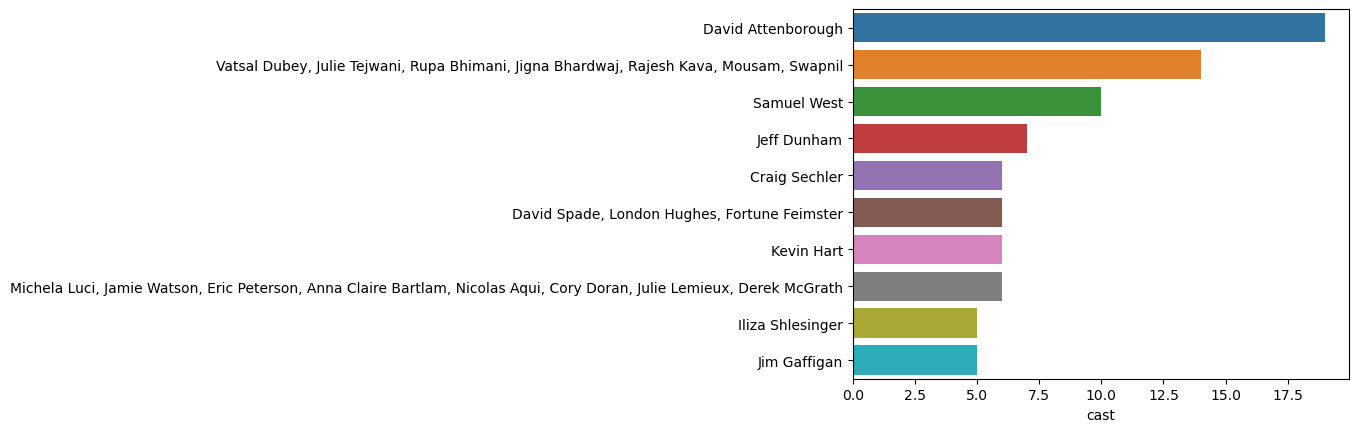

In [42]:
sns.barplot(cast_df , x = 'cast' , y = cast_df.index)